# REDES CONVOLUCIONALES 

---



> **PREDICCIÓN DE JAQUES Y JAQUES MATE SOBRE UNA POSICIÓN DE AJEDREZ**



Importamos las librerias necesarias para entrenar y crear la red.

In [ ]:
#Para cargar y operar con el dataset
import pandas as pd
import numpy as np

#Para entrenar y crear el modelo de la red convolucional
import tensorflow as tf
from tensorflow.keras.layers import Dropout
from tensorflow.keras import layers, models
from keras.callbacks import EarlyStopping

#Para imprimir el modelo
import matplotlib.pyplot as plt

In [ ]:
print(tf.__version__)

2.11.0


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Para la entrada de la red convolucinal usaremos una matriz que contenga cada casilla del tablero y las piezas del mismo, es decir, si tuvieramos esta posición:


<br/>

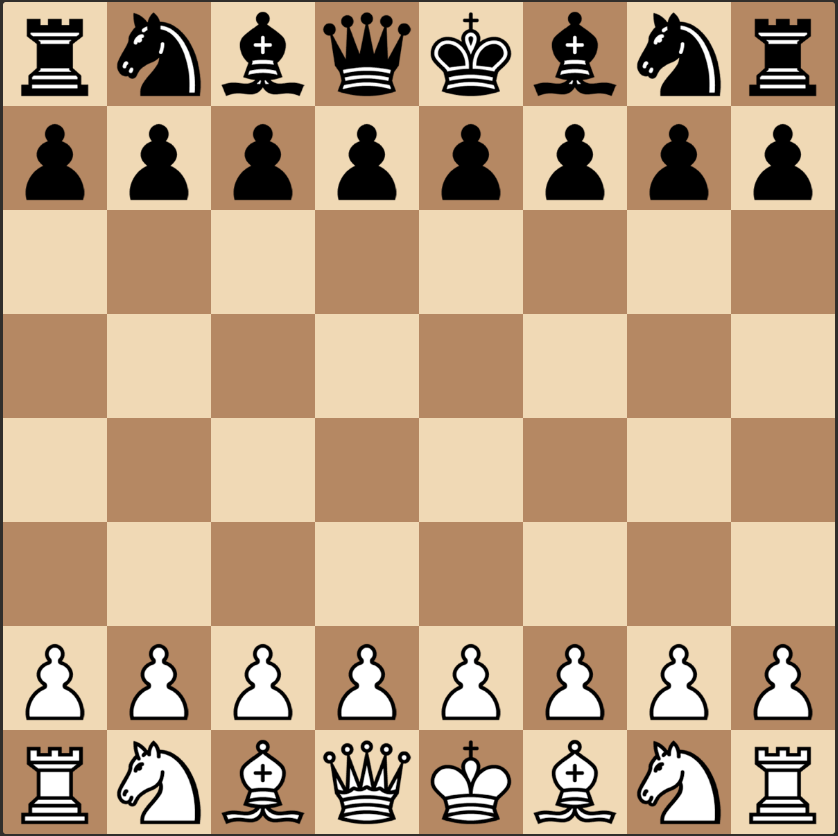

<br/>
<br/>
Tendríamos esta matriz:
<br/>
<br/>
-4  -2  -3  -5  -6  -3  -2  -4

-1  -1  -1  -1  -1  -1  -1  -1

0  0  0  0  0  0  0  0

0  0  0  0  0  0  0  0

0  0  0  0  0  0  0  0

0  0  0  0  0  0  0  0

1  1  1  1  1  1  1  1

4  2  3  5  6  3  2  4

<br/>

Una vez tenemos la matriz de entrada separamos la misma para cada pieza del tablero, un ejemplo para los peones blancos sería el siguiente:

<br/>

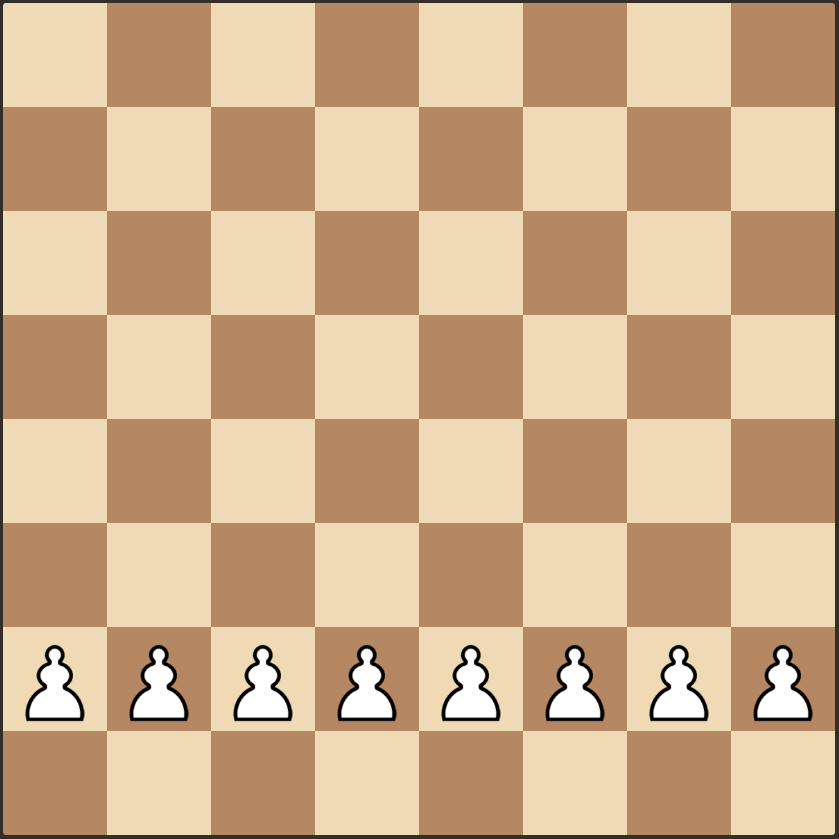

<br/>
<br/>

Esta sería su matriz:


<br/>


0  0  0  0  0  0  0  0

0  0  0  0  0  0  0  0

0  0  0  0  0  0  0  0

0  0  0  0  0  0  0  0

0  0  0  0  0  0  0  0

0  0  0  0  0  0  0  0

1  1  1  1  1  1  1  1

0  0  0  0  0  0  0  0


<br/>
<br/>

Separamos la posición a entera para cada pieza del tablero y le damos ese mapa como entrada de la red, el resultado (Output) será un 1 para los jaques o jaques mate, dependiendo del fichero usado y un 0 si no hubiera ninguno de los dos.



* Cargamos el dataset, en caso de no estar incluido, incluirlo en el entorno de 
ejecución

In [ ]:
#Importamos los ficheros con el datastet de las posiciones y si es jaque

train = pd.read_json('drive/MyDrive/Colab Notebooks/Alphaupo-Convolucionales/trainJaquesMap.json')
test = pd.read_json('drive/MyDrive/Colab Notebooks/Alphaupo-Convolucionales/testJaquesMap.json')



* Imprimimos las cinco primeras filas del dataset, donde posiciones contiene la posición completa, y contiene el resultado y las demás columnas contiene la imagen de la posición con cada una de las piezas indicadas en el nombre

In [ ]:
train.head()

,posiciones,y,peones_blancos,peones_negros,caballos_blancos,caballos_negros,alfiles_blancos,alfiles_negros,torres_blancos,torres_negros,reina_blancos,reina_negros,rey_blancos,rey_negros
0,"[[-4, 0, -3, -5, -6, -3, 0, -4], [0, 0, -1, -1...",1,"[[0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, ...","[[0, 0, 0, 0, 0, 0, 0, 0], [0, 0, -1, -1, 0, -...","[[0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, ...","[[0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, ...","[[0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, ...","[[0, 0, -3, 0, 0, -3, 0, 0], [0, 0, 0, 0, 0, 0...","[[0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, ...","[[-4, 0, 0, 0, 0, 0, 0, -4], [0, 0, 0, 0, 0, 0...","[[0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, ...","[[0, 0, 0, -5, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0,...","[[0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, ...","[[0, 0, 0, 0, -6, 0, 0, 0], [0, 0, 0, 0, 0, 0,..."
1,"[[-4, 0, -3, 0, -6, -3, 0, -4], [0, 0, -1, -1,...",1,"[[0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, ...","[[0, 0, 0, 0, 0, 0, 0, 0], [0, 0, -1, -1, 0, -...","[[0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, ...","[[0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, ...","[[0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, ...","[[0, 0, -3, 0, 0, -3, 0, 0], [0, 0, 0, 0, 0, 0...","[[0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, ...","[[-4, 0, 0, 0, 0, 0, 0, -4], [0, 0, 0, 0, 0, 0...","[[0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 5, 0, ...","[[0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, ...","[[0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, ...","[[0, 0, 0, 0, -6, 0, 0, 0], [0, 0, 0, 0, 0, 0,..."
2,"[[0, -4, -3, 0, 0, -3, 0, -4], [-1, 0, 0, -1, ...",1,"[[0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 1, 0, ...","[[0, 0, 0, 0, 0, 0, 0, 0], [-1, 0, 0, -1, 0, 0...","[[0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, ...","[[0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, ...","[[0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, ...","[[0, 0, -3, 0, 0, -3, 0, 0], [0, 0, 0, 0, 0, 0...","[[0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, ...","[[0, -4, 0, 0, 0, 0, 0, -4], [0, 0, 0, 0, 0, 0...","[[0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, ...","[[0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, ...","[[0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, ...","[[0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, -6,..."
3,"[[-4, -2, -3, 0, 0, -6, 0, -4], [-1, -1, -1, -...",1,"[[0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, ...","[[0, 0, 0, 0, 0, 0, 0, 0], [-1, -1, -1, -1, 0,...","[[0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, ...","[[0, -2, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0,...","[[0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, ...","[[0, 0, -3, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0,...","[[0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, ...","[[-4, 0, 0, 0, 0, 0, 0, -4], [0, 0, 0, 0, 0, 0...","[[0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, ...","[[0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, -5, 0,...","[[0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, ...","[[0, 0, 0, 0, 0, -6, 0, 0], [0, 0, 0, 0, 0, 0,..."
4,"[[-4, 0, 0, 0, 0, -3, 0, -4], [-1, 0, 0, 0, -1...",1,"[[0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, ...","[[0, 0, 0, 0, 0, 0, 0, 0], [-1, 0, 0, 0, -1, 0...","[[0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, ...","[[0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, ...","[[0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, ...","[[0, 0, 0, 0, 0, -3, 0, 0], [0, 0, 0, 0, 0, 0,...","[[0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, ...","[[-4, 0, 0, 0, 0, 0, 0, -4], [0, 0, 0, 0, 0, 0...","[[0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, ...","[[0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, ...","[[0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, ...","[[0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, ..."


* Separamos la X y la Y para la entrada y comprobación de la red, en X guardamos todas las columnas del dataset menos y, en Y guardamos la y del dataset

In [ ]:
#Separamos los valores del output (y) y input(x)
trainX = tf.constant(train.drop("y",axis=1).values.tolist())
testX = tf.constant(test.drop("y",axis=1).values.tolist())

trainY = tf.constant(train["y"].values)
testY = tf.constant(test["y"].values)

* Creamos el modelo de la red convolucional usando tensorflow y keras

In [ ]:
#Creamos el modelo de la red convolucional

model = models.Sequential()
model.add(layers.Conv2D(64, (2, 2), activation='relu', input_shape=(13, 8, 8)))
model.add(layers.MaxPooling2D((1, 1)))
model.add(Dropout(0.5))
model.add(layers.Conv2D(128, (2, 2), activation='relu'))
model.add(layers.MaxPooling2D((1, 1)))
model.add(Dropout(0.5))
model.add(layers.Conv2D(256, (2, 2), activation='relu'))
model.add(layers.MaxPooling2D((1, 1)))
model.add(Dropout(0.5))
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(2))

* Resumen del modelo

In [ ]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 12, 7, 64)         2112      
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 12, 7, 64)        0         
 2D)                                                             
                                                                 
 dropout_6 (Dropout)         (None, 12, 7, 64)         0         
                                                                 
 conv2d_7 (Conv2D)           (None, 11, 6, 128)        32896     
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 11, 6, 128)       0         
 2D)                                                             
                                                                 
 dropout_7 (Dropout)         (None, 11, 6, 128)       

* Compilamos el modelo

In [ ]:
#Compilamos el modelo

model.compile(optimizer=tf.keras.optimizers.Adam(),
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

* Entrenamos el modelo

In [ ]:
#Entrenamos el modelo


# Define early stopping criteria
early_stop = EarlyStopping(monitor='val_loss', patience=5, verbose=1)

# Train the model with early stopping
history = model.fit(trainX, trainY, epochs=500, 
                    validation_data=(testX, testY),
                    callbacks=[early_stop])


Epoch 1/500
1250/1250 [==============================] - 10s 5ms/step - loss: 0.4697 - accuracy: 0.7804 - val_loss: 0.3689 - val_accuracy: 0.8385
Epoch 2/500
1250/1250 [==============================] - 7s 6ms/step - loss: 0.3691 - accuracy: 0.8398 - val_loss: 0.3190 - val_accuracy: 0.8585
Epoch 3/500
1250/1250 [==============================] - 6s 5ms/step - loss: 0.3309 - accuracy: 0.8564 - val_loss: 0.2864 - val_accuracy: 0.8783
Epoch 4/500
1250/1250 [==============================] - 7s 6ms/step - loss: 0.3025 - accuracy: 0.8709 - val_loss: 0.2782 - val_accuracy: 0.8810
Epoch 5/500
1250/1250 [==============================] - 6s 5ms/step - loss: 0.2843 - accuracy: 0.8797 - val_loss: 0.2547 - val_accuracy: 0.8930
Epoch 6/500
1250/1250 [==============================] - 7s 6ms/step - loss: 0.2668 - accuracy: 0.8884 - val_loss: 0.2303 - val_accuracy: 0.9080
Epoch 7/500
1250/1250 [==============================] - 6s 5ms/step - loss: 0.2552 - accuracy: 0.8931 - val_loss: 0.2260 - val_a

* Imprimimos los resultados del entrenamiento

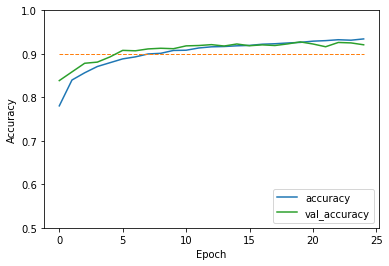

In [ ]:
#Hacemos el plot de la precision de entrenamiento y de test

arr = np.full((len(history.history['accuracy']), ), 0.9)
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(arr, "--", linewidth=1)
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

* Imprimimos la perdida de train en azul y de test en naranja

<Axes: >

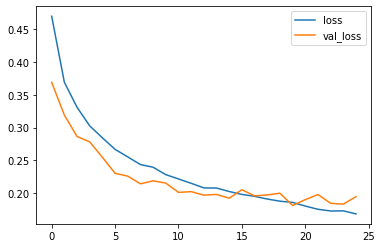

In [ ]:
#Imprimimos la perdida

metrics_df = pd.DataFrame(history.history)
metrics_df[["loss","val_loss"]].plot()

* Hacemos las predicciones sobre el conjunto de test

In [ ]:
#Hacemos las predicciones sobre el conjunto de test

res = model.predict(testX)

print(model.predict(np.array([testX[0]])))
print(res[0])

1/1 [==============================] - 0s 76ms/step
[[0.33860248 2.116118  ]]
[0.33860278 2.116119  ]


* Imprimimos el número de aciertos sobre el conjunto de test

In [ ]:
#Imprimimos la tasa de acierto sobre el conjunto de test

a = np.array(testY)
b= np.argmax(res,axis=1)
cont = 0

for i in range(0, len(a)):
  if a[i] == b [i]:
    cont = cont +1

print("Resultado: "+str(cont)+"/"+str(len(a)))
print("Tasa de acierto: "+str((cont/len(a))*100)+"%")


Resultado: 5525/6000
Tasa de acierto: 92.08333333333333%


* Importamos tensorflowjs para exportar el modelo a javascript y python

In [ ]:
!pip install tensorflowjs
import tensorflowjs as tfjs

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.1/85.1 KB 3.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 108.8/108.8 KB 13.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.4/16.4 MB 57.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.9/40.9 KB 4.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 585.9/585.9 MB 2.5 MB/s eta 0:00:00
INFO: pip is looking at multiple versions of tensorflow-decision-forests to determine which version is compatible with other requirements. This could take a while.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.5/16.5 MB 62.4 MB/s eta 0:00:00
  Attempting uninstall: tensorflow-hub
    Found existing installation: tensorflow-hub 0.13.0
    Uninstalling tensorflow-hub-0.13.0:
      Successfully uninstalled tensorflow-hub-0.13.0
  Attempting uninstall: packaging
    Found existing installation:

* Exportamos el modelo

In [ ]:
model.save('drive/MyDrive/Colab Notebooks/Alphaupo-Convolucionales/modeloJaques')

* Exportamos el modelo para javascript

In [ ]:
tfjs.converters.save_keras_model(model, "drive/MyDrive/Colab Notebooks/Alphaupo-Convolucionales/ModelosJS/modeloJaques")